In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
import xgboost as xgb
import joblib


In [ ]:
# Load Data
data = pd.read_csv("D:/Breast Cancer/Cancer_Data.csv")

# Drop unnecessary columns
data.drop(columns=[col for col in ['Unnamed: 32', 'id'] if col in data.columns], inplace=True)

data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Data Information
print(data.info())
print(data.describe())
print(data.describe(include="object"))

# Missing or zero values
print(((data == 0) | (data.isnull())).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<Figure size 1800x1400 with 0 Axes>

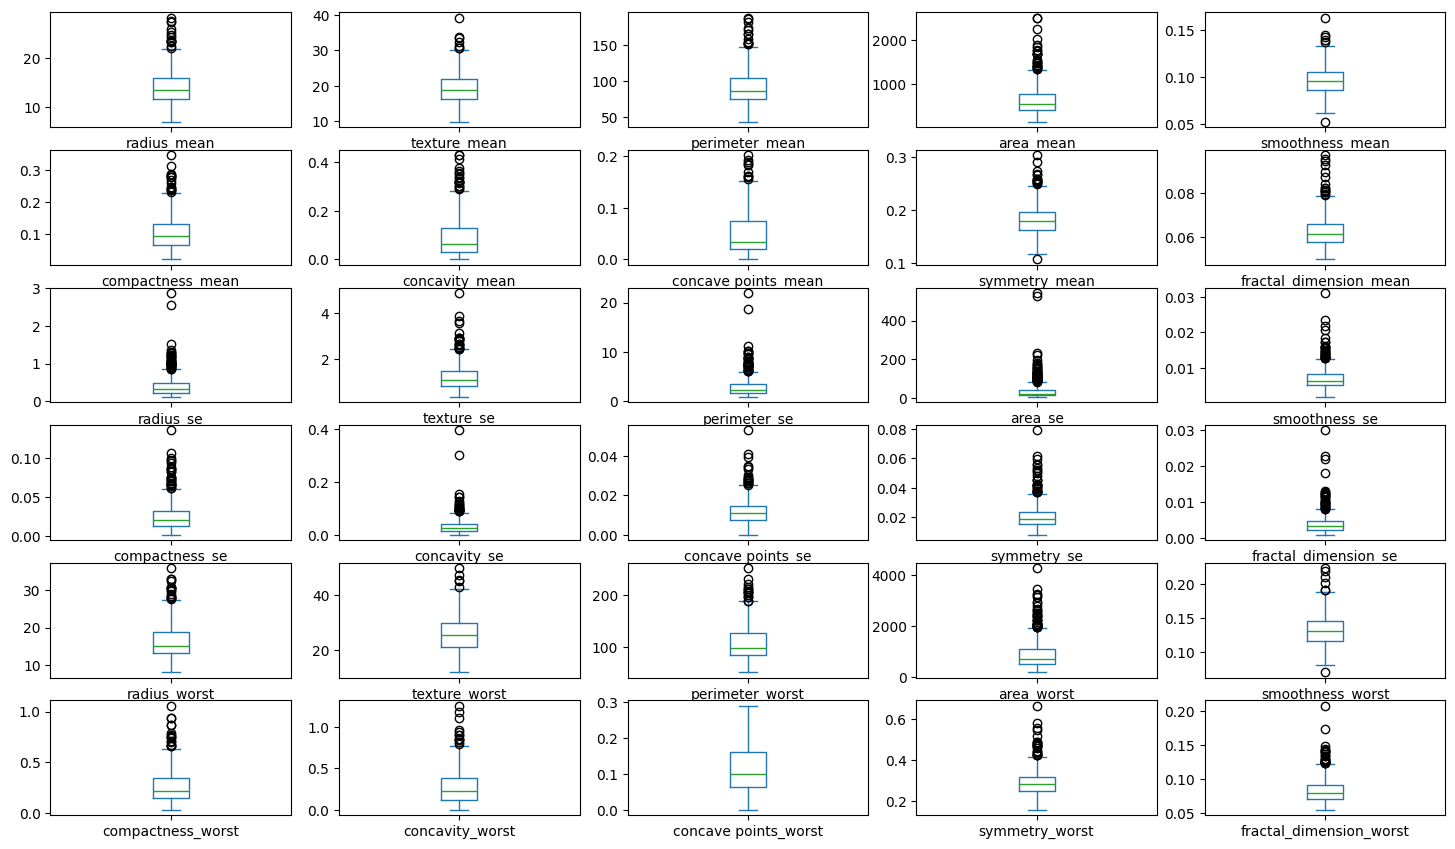

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\3030462239.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='diagnosis', palette='Set2')


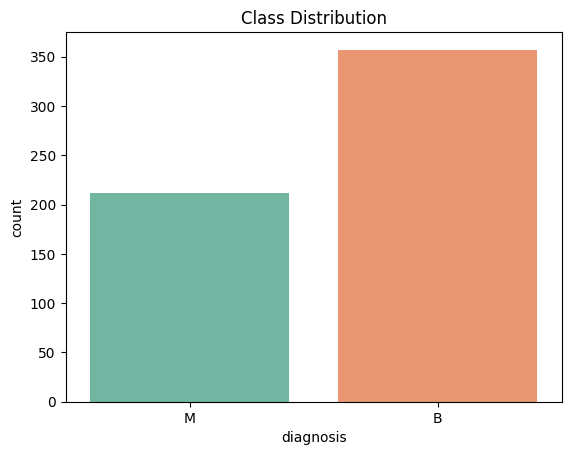

In [ ]:
# Data Visualizations
# Feature distribution
plt.figure(figsize=(18,14))
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(18,14))
plt.show()

# Class distribution
sns.countplot(data=data, x='diagnosis', palette='Set2')
plt.title('Class Distribution')
plt.show()


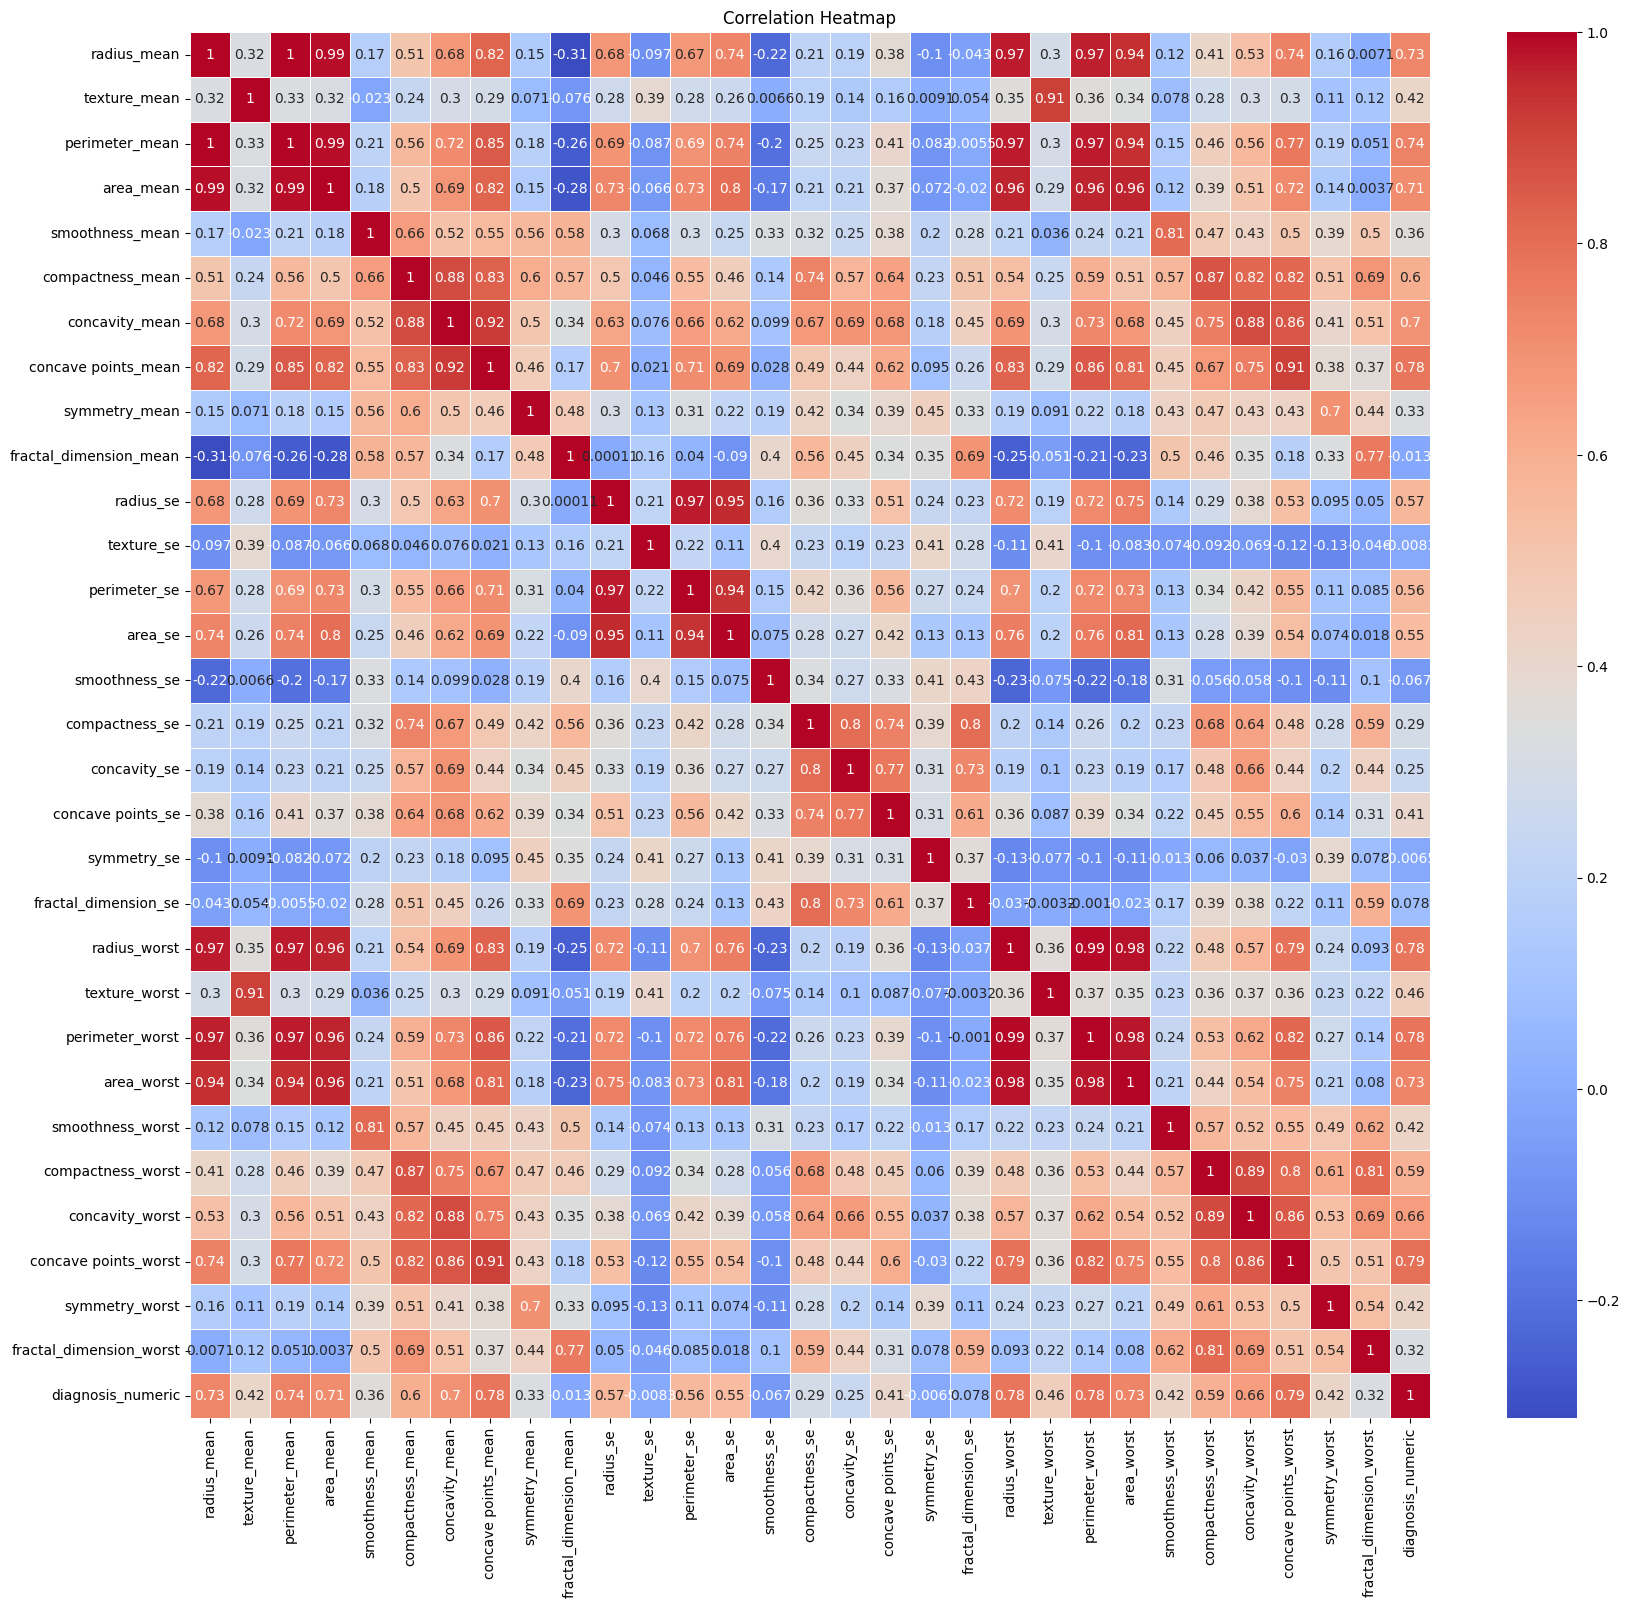

In [ ]:
# Correlation Analysis
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})

corr = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


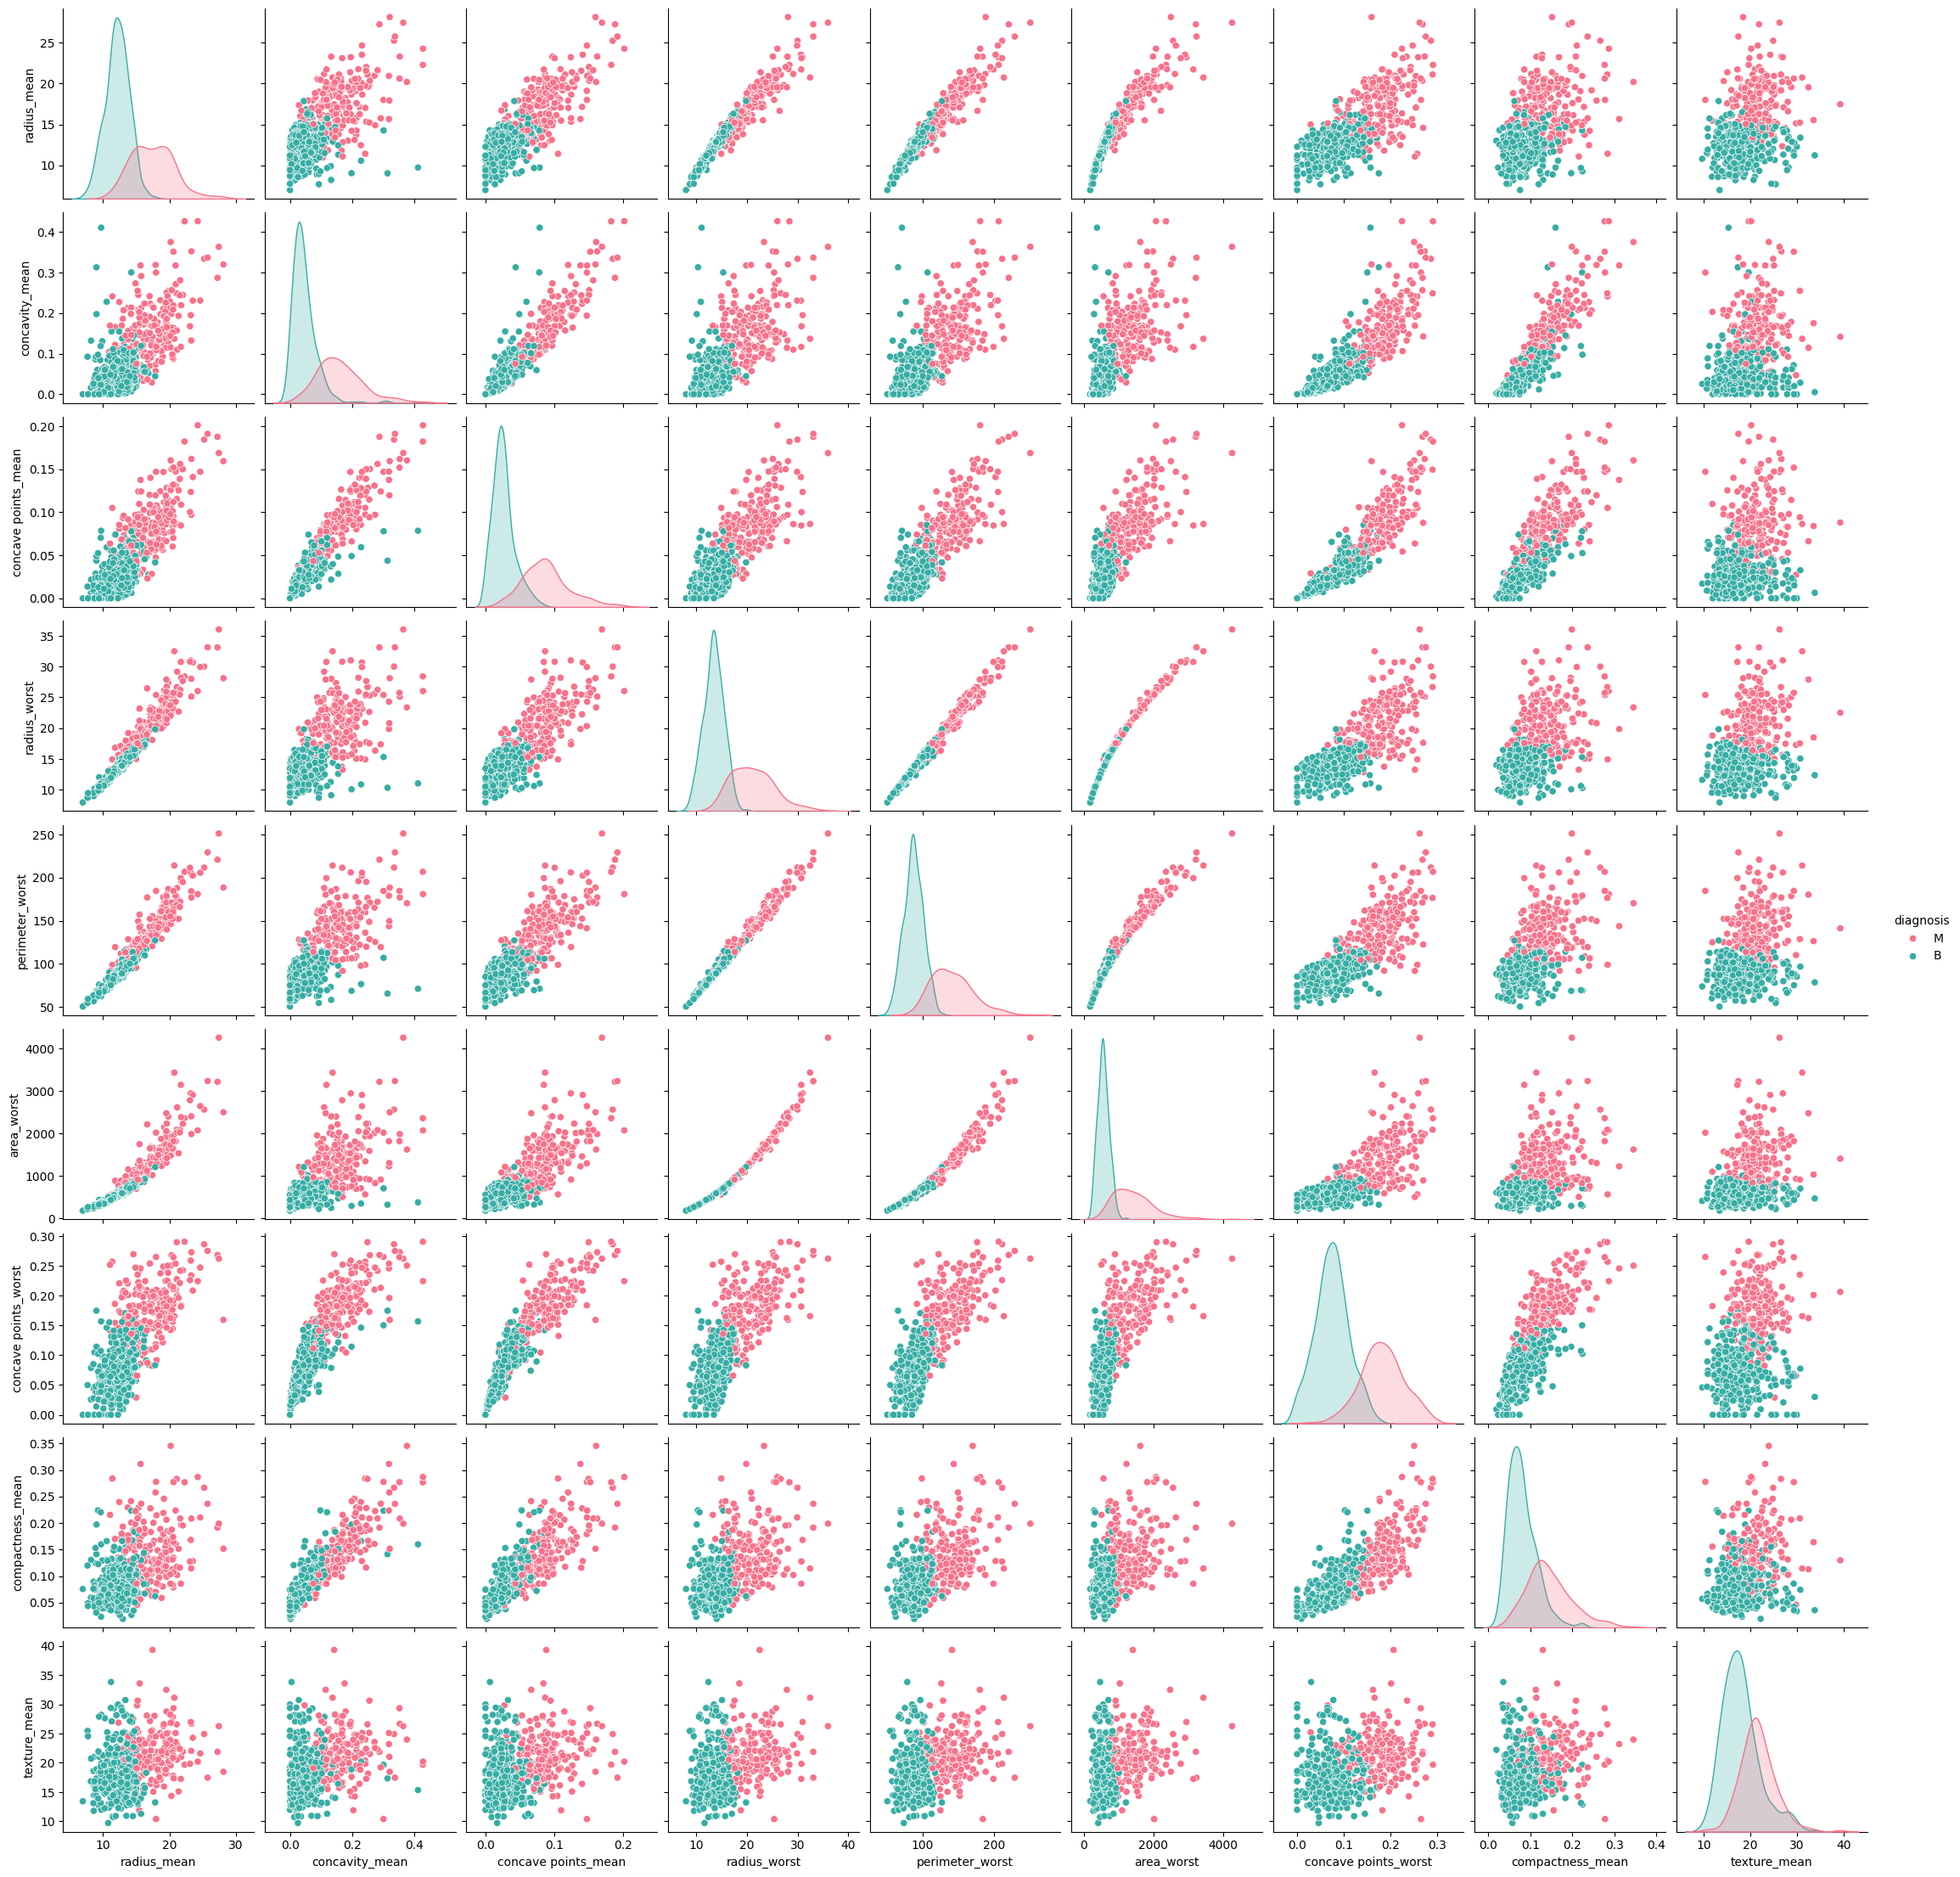

In [ ]:
# Feature Selection
selected_features = [
    'radius_mean', 'concavity_mean', 'concave points_mean', 
    'radius_worst', 'perimeter_worst', 'area_worst', 
    'concave points_worst', 'compactness_mean', 'texture_mean'
]

sns.pairplot(data[selected_features + ['diagnosis']], hue='diagnosis', palette='husl')
plt.show()


C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


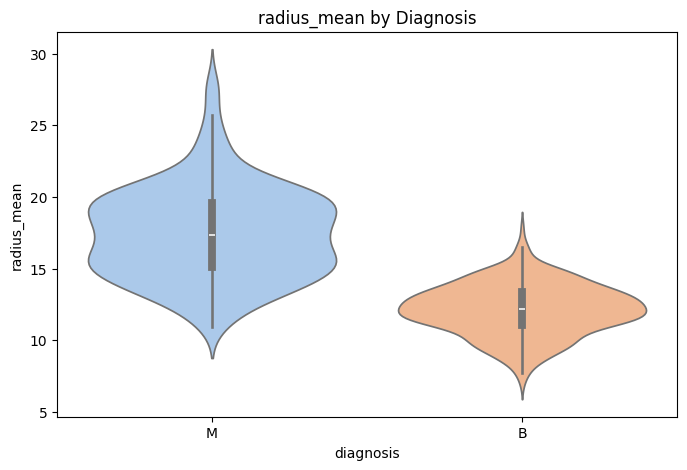

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


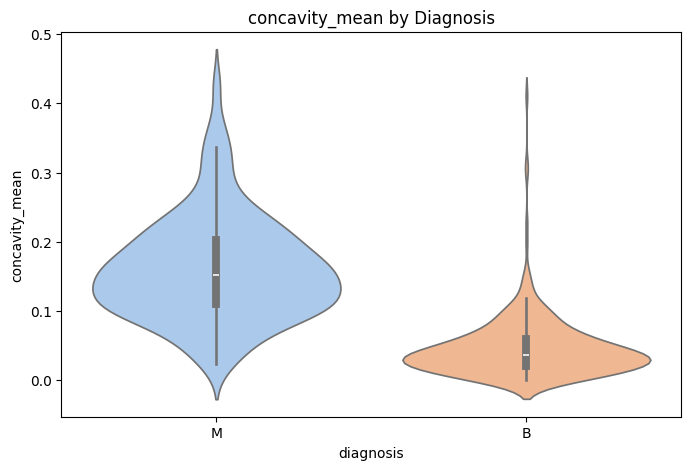

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


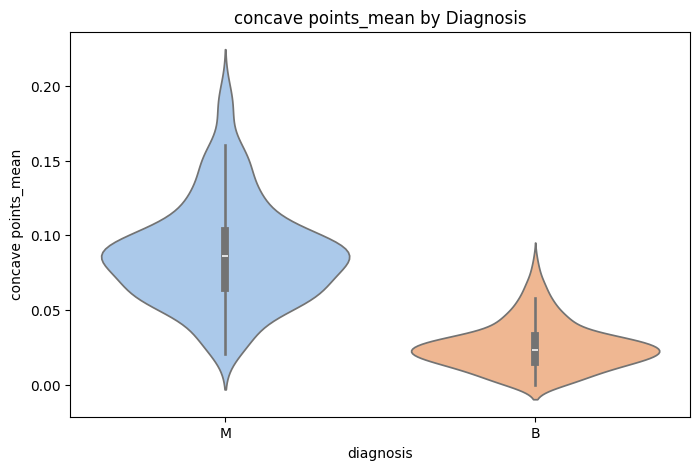

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


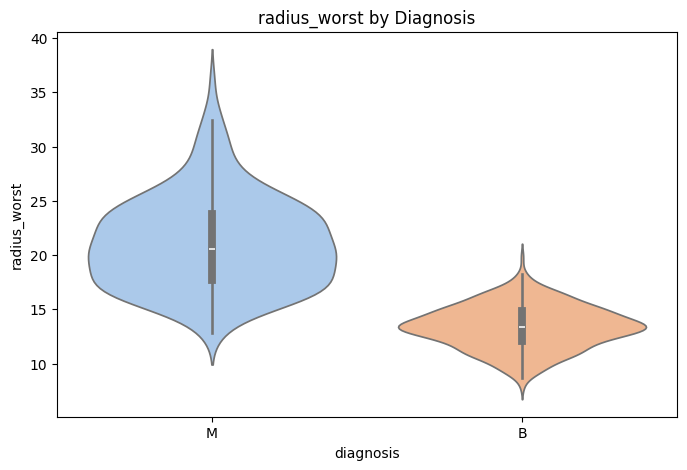

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


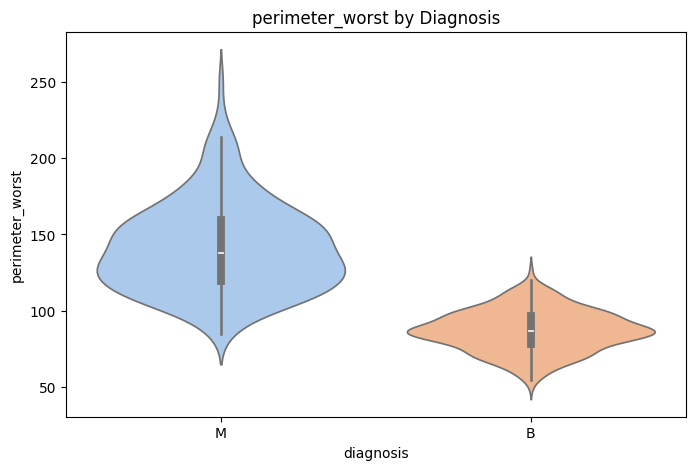

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


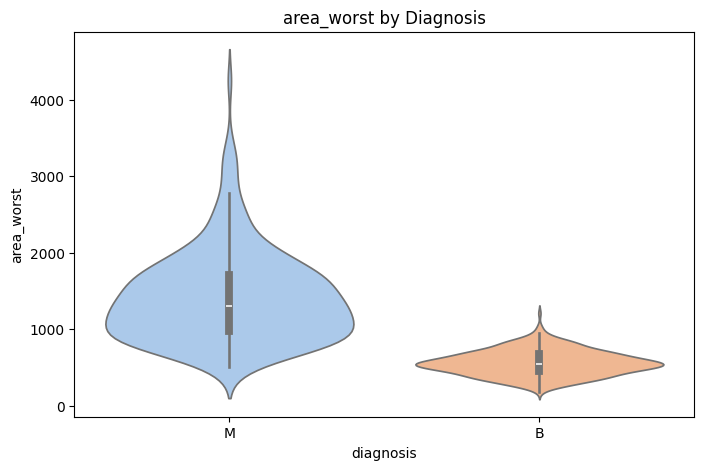

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


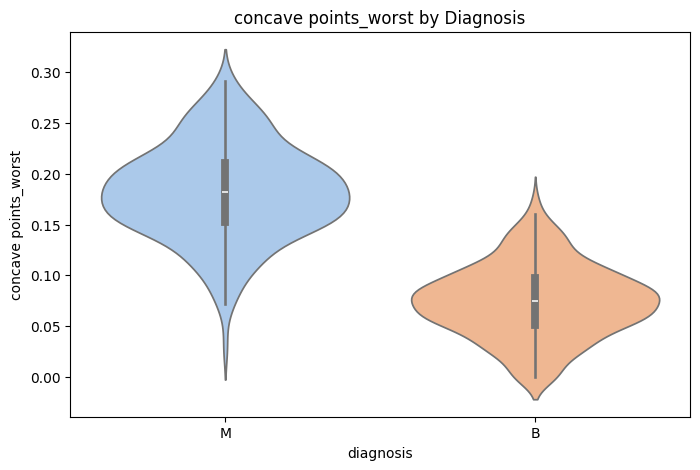

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


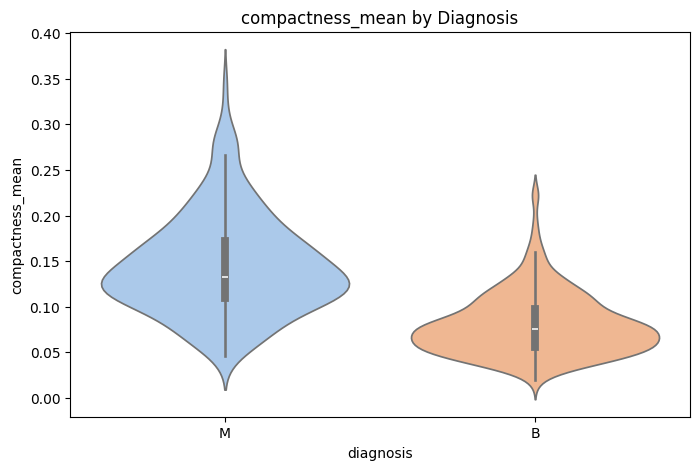

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1672318280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')


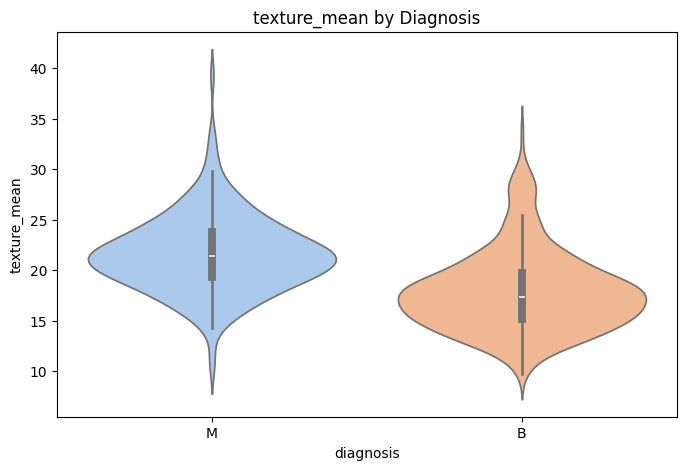

In [ ]:
# Feature Distributions
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='diagnosis', y=feature, data=data, palette='pastel')
    plt.title(f'{feature} by Diagnosis')
    plt.show()


In [ ]:
# Train-Test Split
X = data[selected_features]
y = data['diagnosis_numeric']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)


In [ ]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "ANN": MLPClassifier(max_iter=1000, random_state=42)
}


In [ ]:
# Train & Evaluate
results = {}

for name, model in models.items():
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    acc = accuracy_score(test_y, preds)
    results[name] = acc
    
    print("="*50)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(test_y, preds))
    print("Classification Report:\n", classification_report(test_y, preds))


Model: Logistic Regression
Accuracy: 0.9737
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Model: XGBoost
Accuracy: 0.9561
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Model: Random Forest
Accuracy: 0.9561
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   

C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\2885950709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


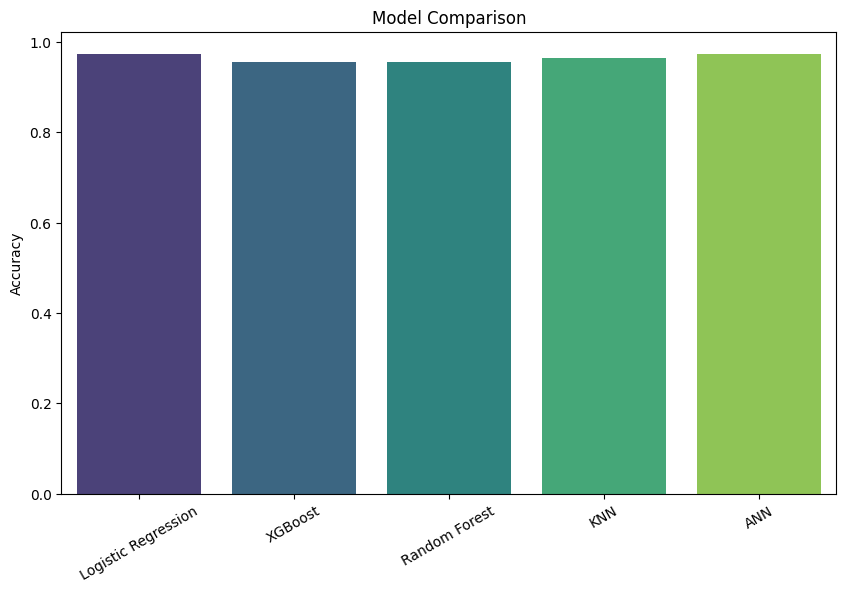

In [ ]:
# Model Comparision
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=30)
plt.show()


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, RandomizedSearchCV

# Stratified CV ensures class balance, repeated for stability
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Expanded param grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 5, 10, 20],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': [None, 'balanced']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan / Euclidean
    },
    "ANN": {
        'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

best_models, best_scores = {}, {}

for name, grid in param_grids.items():
    print(f"\n🔍 Tuning {name}...")
    
    search = RandomizedSearchCV(
        estimator=models[name],
        param_distributions=grid,
        n_iter=20,  # try 20 random combos per model
        cv=cv,
        scoring={'accuracy': 'accuracy', 'recall': 'recall', 'f1': 'f1'},
        refit='recall',  # prioritize recall (important for medical use case)
        n_jobs=-1,
        random_state=42
    )
    
    search.fit(train_X, train_y)
    
    best_models[name] = search.best_estimator_
    best_scores[name] = (search.best_params_, search.best_score_)
    
    print(f"{name} Best Params: {search.best_params_}, Best Recall CV: {search.best_score_:.4f}")



🔍 Tuning Logistic Regression...
Logistic Regression Best Params: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1}, Best Recall CV: 0.9643

🔍 Tuning XGBoost...
XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Best Recall CV: 0.9464

🔍 Tuning Random Forest...
Random Forest Best Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'class_weight': None}, Best Recall CV: 0.9446

🔍 Tuning KNN...
KNN Best Params: {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}, Best Recall CV: 0.9308

🔍 Tuning ANN...
ANN Best Params: {'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}, Best Recall CV: 0.9525


In [ ]:
# Results
df_results = pd.DataFrame(best_scores).T
df_results.columns = ["Best Params", "CV Accuracy"]
print(df_results)

for name, model in best_models.items():
    joblib.dump(model, f"best_{name.replace(' ', '_').lower()}.pkl")


                                                           Best Params  \
Logistic Regression  {'solver': 'liblinear', 'penalty': 'l1', 'clas...   
XGBoost              {'subsample': 0.8, 'n_estimators': 300, 'max_d...   
Random Forest        {'n_estimators': 300, 'min_samples_split': 10,...   
KNN                   {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}   
ANN                  {'learning_rate': 'adaptive', 'hidden_layer_si...   

                    CV Accuracy  
Logistic Regression    0.964338  
XGBoost                0.946446  
Random Forest          0.944608  
KNN                     0.93076  
ANN                    0.952451  


=== Logistic Regression ===


C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1158382308.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")


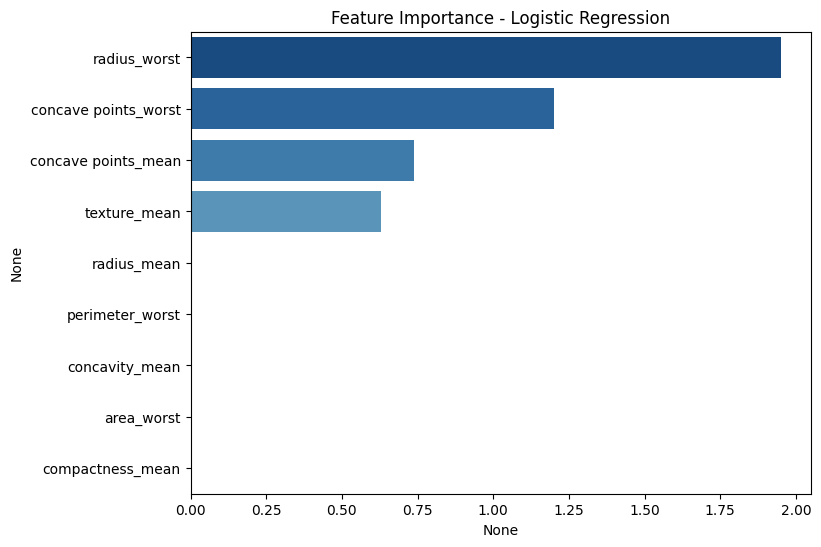

=== XGBoost ===


C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1158382308.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")


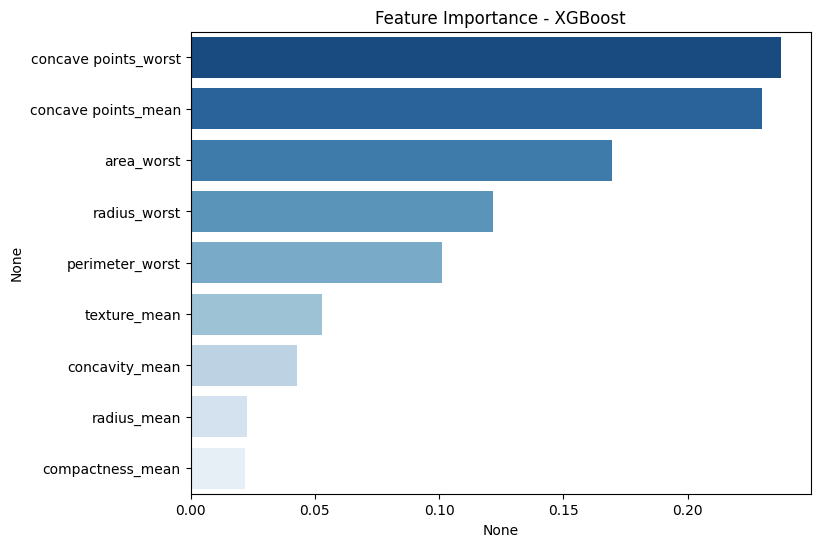

=== Random Forest ===


C:\Users\yuvia\AppData\Local\Temp\ipykernel_32872\1158382308.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")


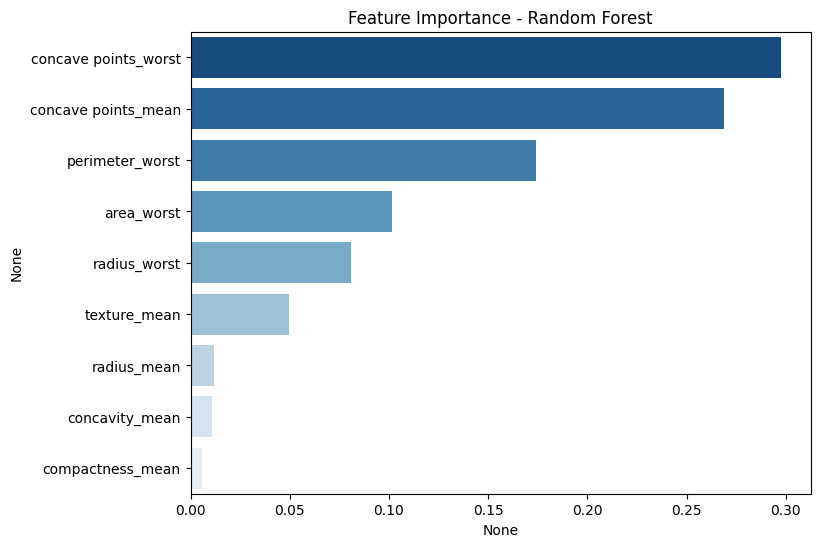

=== KNN ===
Feature importance not available for KNN
=== ANN ===
Feature importance not available for ANN


In [ ]:
# Feature Importance for Multiple Models
def plot_feature_importance(model, model_name, features):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        # For linear models (Logistic Regression, Linear SVC)
        importance = np.abs(model.coef_[0])
    else:
        print(f"Feature importance not available for {model_name}")
        return
    
    feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)
    
    plt.figure(figsize=(8,6))
    sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

# Plot for models that support feature importance
for name, model in best_models.items():
    print(f"=== {name} ===")
    plot_feature_importance(model, name, selected_features)


In [ ]:
# Cross-Validation Scores
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression: 0.9543 ± 0.0238
XGBoost: 0.9596 ± 0.0273
Random Forest: 0.9632 ± 0.0328
KNN: 0.9069 ± 0.0208
ANN: 0.9174 ± 0.0333


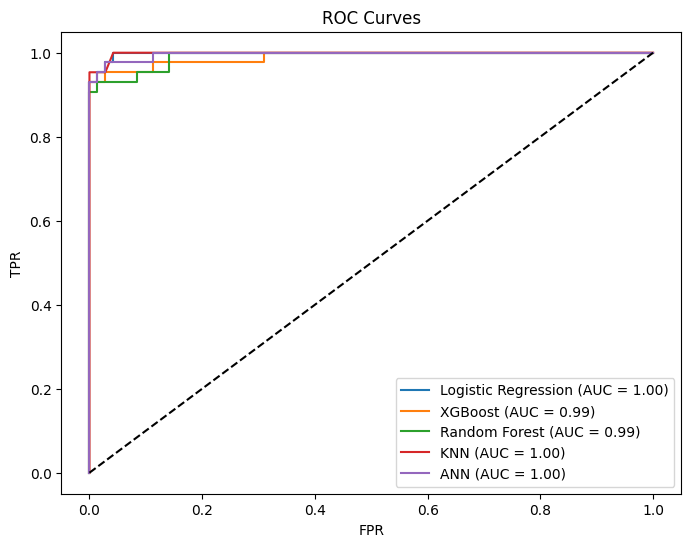

In [ ]:
# ROC Curves
plt.figure(figsize=(8,6))

for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(test_X)[:, 1]
    else:
        y_proba = model.decision_function(test_X)
    fpr, tpr, _ = roc_curve(test_y, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


In [ ]:
# Evaluate Models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for name, model in best_models.items():
    print(f"\n=== {name} ===")
    preds = model.predict(test_X)
    acc = accuracy_score(test_y, preds)
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(test_y, preds))
    print("Classification Report:")
    print(classification_report(test_y, preds))



=== Logistic Regression ===
Accuracy: 0.9737
Confusion Matrix:
[[68  3]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.93      1.00      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114


=== XGBoost ===
Accuracy: 0.9561
Confusion Matrix:
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


=== Random Forest ===
Accuracy: 0.9561
Confusion Matrix:
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   